1. Complete Problem 2.21: 
"Use a computer to plot formula 2.22 directly, as follows. Define $ z = \frac{q_{A}}{q}$. Then, aside from an overall constant that we'll ignore, the multiplicity function is $[4z(1-z)]^{N}$, where z ranges from 0 to 1 and the factor of 4 ensure the height of the peak is equal to 1 for any $N$. Plot this function for $N = 1, 10, 100, 1000,$ and $10,000$. Observe how the width of the peak decreases as N increases."


2. We have learned that the multiplicity of two large interacting Einstein solids is a Gaussian,
i.e., Equation (2.27). Introduce the same variable z as in Part 1 and express the Gaussian in
terms of z. Now plot the Gaussian for the same set of N values as Part 1 assuming
Ωmax = 1. Eqaution 2.27: $ \Omega_{max} \cdot e^{-N(\frac{2x}{q})^{2}} $


3. When N is large, the two plots you obtain from Parts 1 and 2 overlap, but a noticeable
difference exists between the plots when N is small. Suppose if the difference in the widths
of the two distributions is small, we say the two distributions are the same. Let’s measure
the width of each distribution by using full width at half maximum (FWHM). Find FWHM
of each distribution in Parts 1 and 2. If the difference in the FWHM is within 5%, we will
say the two distributions are the same. For what values of N , those two distributions are
the same?


4. If N can be any integer, what is the smallest N that will make the two distributions from
Parts 1 and 2 the same?



0.5


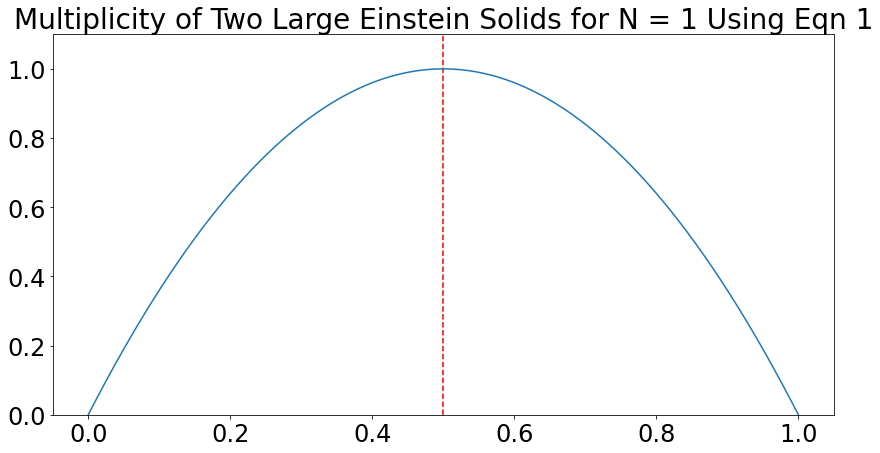

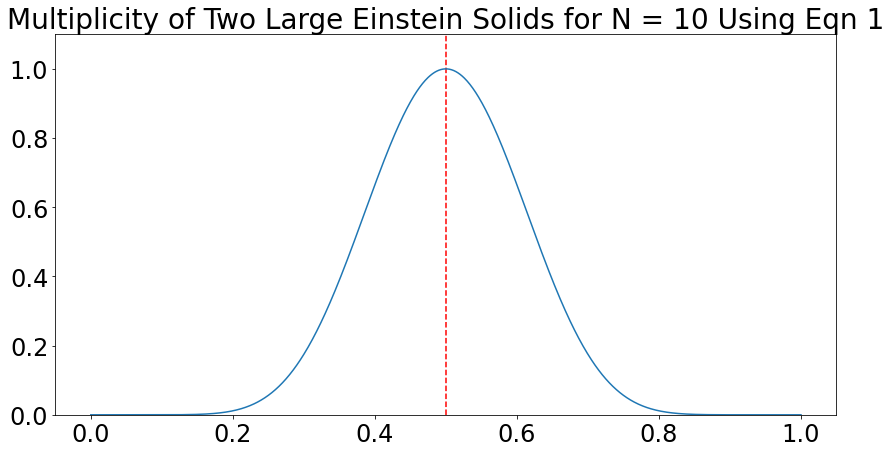

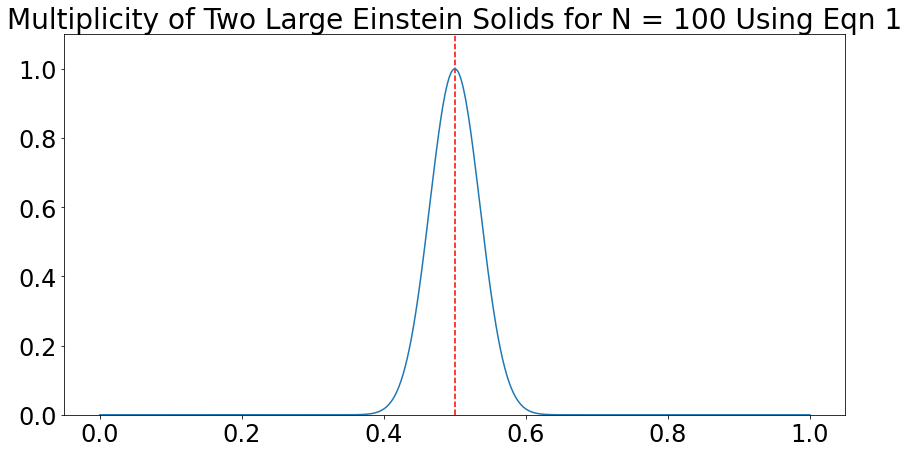

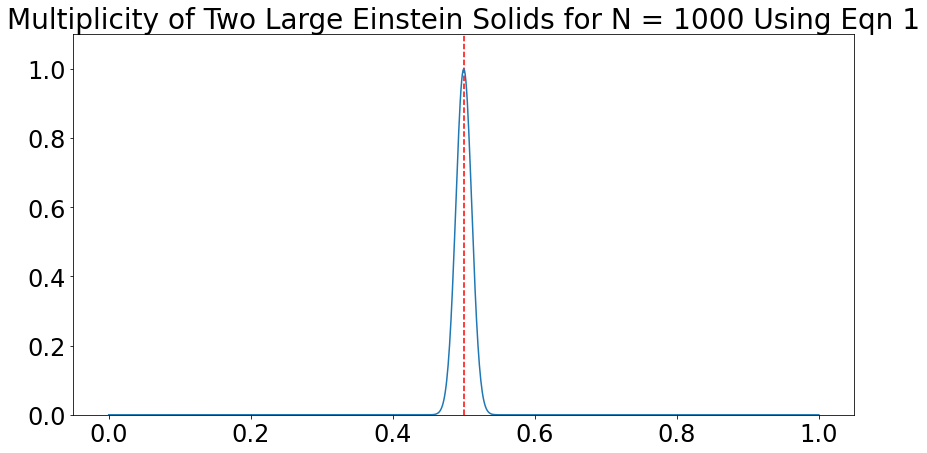

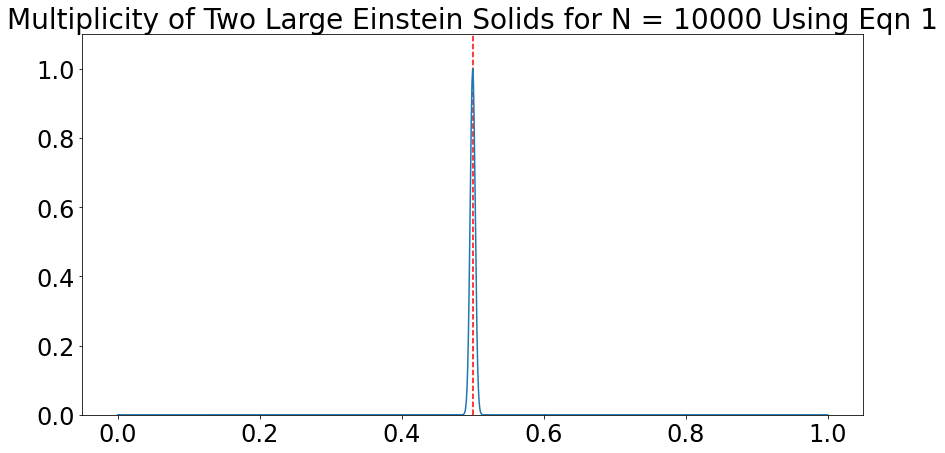

In [8]:
### Imports
import matplotlib.axes
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal as sig
import scipy.stats as stat



### Define constants
z = np.linspace(0, 1, 1001)
print(z[500])
Narr = np.array([1, 10, 100, 1000, 10000])
fwhm = np.array([])
peaks = np.array([500])

### Problem 2.21
for N in Narr:
    omega = np.abs((4*z*(1-z))**N)
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size':24})
    plt.plot(z, omega)
    plt.ylim(0,1.1)
    plt.vlines(0.5, 0, 1.1, color ='r', linestyle = '--')
    fname = ('FirstEqN{}'.format(N) + '.pdf')
    plt.title('Multiplicity of Two Large Einstein Solids for N = {} Using Eqn 1'.format(N), fontsize = 28)
    plt.savefig(fname)
    plt.show()
    
    curvefwhmtup  = sig.peak_widths(omega, peaks, 0.5) #### this is a tuple
    curvefwhm = np.array(curvefwhmtup[0]) #### this is a useable array



0.5


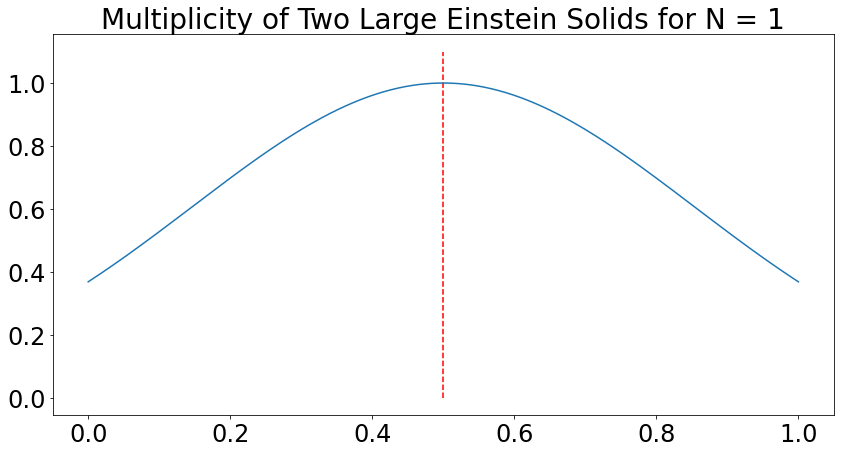

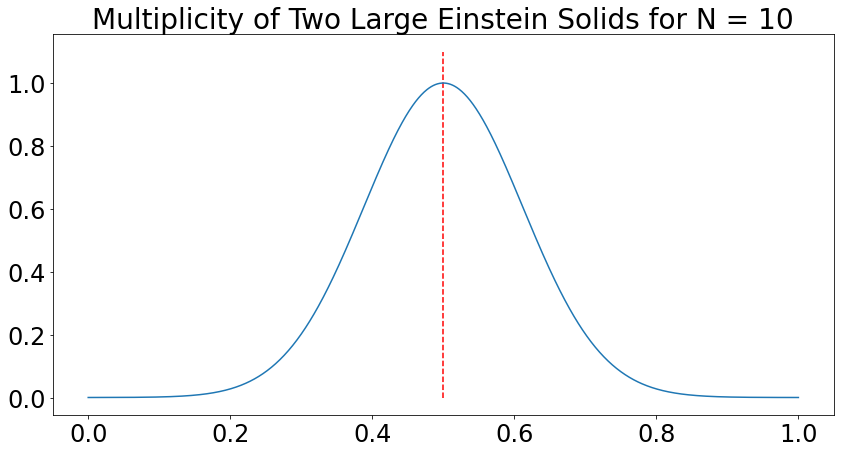

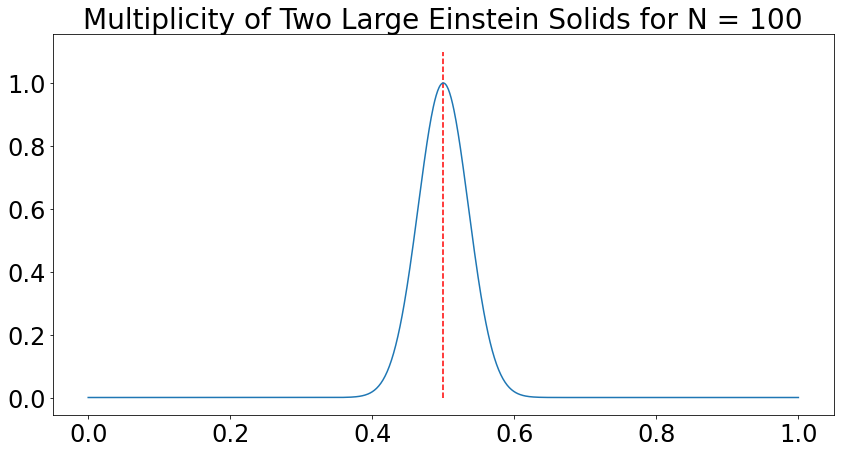

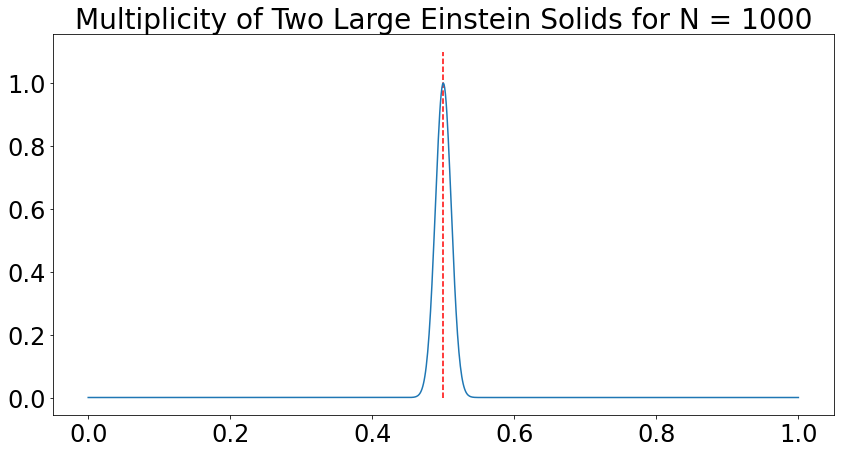

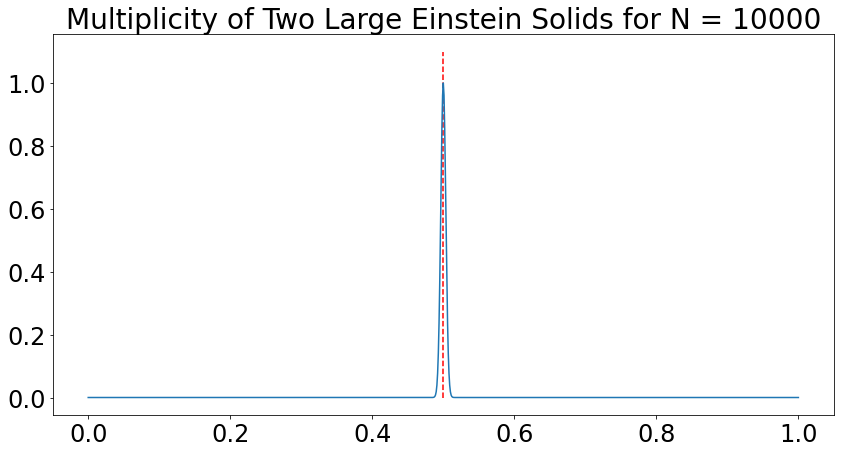

In [9]:
zexp = np.linspace(0, 1, 1001)
print(zexp[500])
for N in Narr:
    omegaexp = np.exp(-N*((2*zexp - 1)**2))
    plt.figure(figsize=(14, 7))
    plt.rcParams.update({'font.size':24})
    plt.plot(zexp, omegaexp)
    plt.title('Multiplicity of Two Large Einstein Solids for N = {}'.format(N), fontsize = 28)
    plt.vlines(0.5, 0, 1.1, color ='r', linestyle = '--')
    fname = ('SecondEqN{}'.format(N) + '.pdf')
    plt.savefig(fname)
    curvefwhmexptup = sig.peak_widths(omegaexp, peaks, 0.5)
    curvefwhmexp = np.array(curvefwhmexptup[0])
   


In [10]:
Nar2 = np.linspace(1, 10, 10)

for N in Narr:
    omega = np.abs((4*z*(1-z))**N)
    curvefwhmtup  = sig.peak_widths(omega, peaks, 0.5)
    curvefwhm = np.array(curvefwhmtup[0]) / 1000
    
    omegaexp = np.exp(-N*((2*zexp - 1)**2))
    curvefwhmexptup = sig.peak_widths(omegaexp, peaks, 0.5)
    curvefwhmexp = np.array(curvefwhmexptup[0]) / 1000
    
    fwhmdiff = ((curvefwhm - curvefwhmexp) / curvefwhm) * 100
    if(fwhmdiff <= 5):
        print('The distributions are equal for {}'.format(N))
        print(curvefwhm, curvefwhmexp)
        print(fwhmdiff)
        #break
    else:
        continue
        
print("Those are the lowest numbers!")

The distributions are equal for 10
[0.25878038] [0.26326894]
[-1.7345038]
The distributions are equal for 100
[0.08311363] [0.0832576]
[-0.17322659]
The distributions are equal for 1000
[0.02632752] [0.02633214]
[-0.01753686]
The distributions are equal for 10000
[0.00834226] [0.00834241]
[-0.0018196]
Those are the lowest numbers!
